# 🦠 COVID-19 Data Analysis Project

This project performs **Exploratory Data Analysis (EDA)** on a global Covid-19 dataset using **Python**, **Pandas**, and **Seaborn**. The goal is to analyze the spread of the virus, visualize missing data, and extract insights regarding confirmed cases, deaths, and recoveries across different regions.

### 🎯 Project Objectives
* **Data Inspection:** Checking for null values and understanding dataset structure using `count()` and `isnull()`.
* **Data Visualization:** Using **Seaborn** to create a heatmap for visual detection of missing values.
* **Data Aggregation:** Grouping data by "Region" to calculate total cases.
* **Filtering & Sorting:** Identifying top-affected regions and filtering out records with low case numbers (<10).
* **Specific Analysis:** Extracting detailed statistics for specific countries (e.g., India).

### 🛠️ Key Techniques & Libraries
* **Pandas:** For data manipulation (`groupby`, `sort_values`, Boolean indexing).
* **Seaborn / Matplotlib:** For data visualization (Heatmap).
* **Data Cleaning:** Handling null values and filtering outliers.

## 1. Importing Libraries and Loading the Dataset

In [22]:
import pandas as pd
df=pd.read_csv("covid_19_data.csv")
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


## 2. Data Inspection: Checking for Null Values
Analyzing the dataset to identify missing data in columns like 'State'.

In [23]:
df.count() #show nun null values

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [24]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

## 3. Visualization: Heatmap of Null Values
Using Seaborn to visualize the presence of null values across the dataset.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


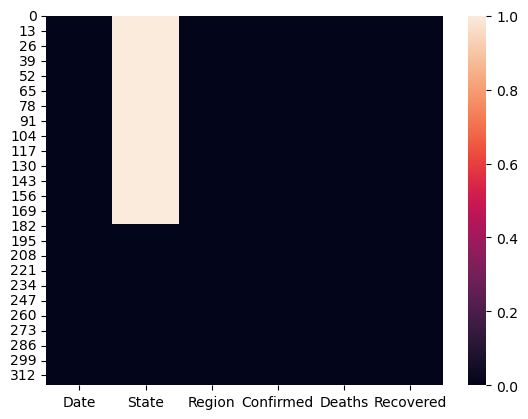

In [26]:
sns.heatmap(df.isnull())
plt.show() #use  to normal python file to show graphics

## 4. Aggregation: Total Cases by Region
Grouping the data by Region to calculate the sum of Confirmed, Deaths, and Recovered cases.

In [27]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [28]:

df.groupby("Region").sum(numeric_only=True).head()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7


In [29]:
df.groupby("Region")["Confirmed"].sum(numeric_only=True).sort_values(ascending=False).head() #Sorting: Top Affected Regions (Confirmed Cases)

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

In [30]:
df.groupby("Region")[["Confirmed","Deaths"]].sum(numeric_only=True)

,Confirmed,Deaths
Region,,
Afghanistan,1939,60
Albania,766,30
Algeria,3848,444
Andorra,743,42
Angola,27,2
...,...,...
West Bank and Gaza,344,2
Western Sahara,6,0
Yemen,6,0


## 5. Filtering: Identifying Low-Case Regions (<10 Confirmed)
Filtering the dataset to see which records have fewer than 10 confirmed cases.

In [31]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [32]:
df.Confirmed <10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [33]:
df[df.Confirmed <10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [34]:
df[~(df.Confirmed <10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [35]:
df=df[~(df.Confirmed <10)]

## 6. Data Cleaning: Removing Low-Case Records
Permanently removing records with fewer than 10 confirmed cases to focus on significant outbreaks.

In [36]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [37]:
df.groupby("Region")["Deaths"].sum(numeric_only=True).sort_values().head(30)

Region
Cambodia                            0
Fiji                                0
Dominica                            0
Central African Republic            0
Eritrea                             0
Laos                                0
Holy See                            0
Nepal                               0
Madagascar                          0
Macau                               0
Mozambique                          0
Mongolia                            0
Namibia                             0
Grenada                             0
Saint Lucia                         0
Saint Vincent and the Grenadines    0
Timor-Leste                         0
Uganda                              0
Seychelles                          0
South Sudan                         0
Rwanda                              0
Saint Kitts and Nevis               0
Vietnam                             0
Liechtenstein                       1
Benin                               1
Gambia                              1
Eswat

In [38]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


## 7. Specific Analysis: Covid-19 Status in India
Extracting and analyzing all records related to India.

In [39]:
df["Region"].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [40]:
df[df["Region"]== "India"]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


## 8. Sorting: Analysis by Recovery Rate
Sorting the data to find regions with the highest number of recovered patients.

In [41]:
df.sort_values(by= ["Confirmed"],ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
156,4/29/2020,NaN,Suriname,10,1,8
27,4/29/2020,NaN,Burundi,11,1,4
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [42]:
df.sort_values(by= ["Recovered"],ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
270,4/29/2020,Northern Mariana Islands,US,14,2,0
299,4/29/2020,South Dakota,US,2373,13,0
298,4/29/2020,South Carolina,US,5882,231,0
302,4/29/2020,Tennessee,US,10366,195,0
